**Load Libaries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from __future__ import division
from sklearn import linear_model

**Motivation**

*The population of foreign nations in Copenhagen and in specific district through the year*

**What is your dataset?**

*The raw dataset is from the [Open Copenhagen data](http://data.kk.dk/) and the data contains information about number of people in age group from different nation living in a specific district for each year from 1994 to 2015 in Copenhagen*
<ol>
   <p>**Variables in the dataset:** </p>
  <li>Aar(e. Year)</li>
  <li>Alder (e. Age)</li>
  <li>Bydel (e. District) </li>
  <li>Personer (e. Population) </li>
  <li>Statkode (e. Code for nation) </li>
</ol>

You can get the data set **[here](http://data.kk.dk/dataset/befolkningen-efter-ar-bydel-alder-og-statsborgerskab)**




**Why did you choose this/these particular dataset(s)?**

*We wanted to see which nations are living in Copenhagen through the years to see if there is any trend which are interesting*


**What was your goal for the end user's experience?**

*In the end the user can look up any country of his preference and see if that particular nation has any trend through the years. Also, find some interesting example of nations moving to Copenhagen or nations moving from Copenhagen.*





*Read in the raw data from open copenhagen data (http://data.kk.dk/dataset/befolkningen-efter-ar-bydel-alder-kon-og-civilstand) and taking out all of the Danes data as we are looking at foreign nation in CPH. Also, adding colum*

In [2]:
BefolkingKBH_Data = pd.read_csv('../Data/befkbhalderstatkode.csv')
BefolkingKBH_Data_noDanes = BefolkingKBH_Data[(BefolkingKBH_Data['STATKODE'] != 5100)].copy()

**Basic stats. Let's understand the dataset better**


**Write about your choices in data cleaning and preprocessing**

*We want to get the date set from the .csv file to a DataFrame and create three different DataFrame from the original DataFrame*

*The DataFrame (Kbh_Stats_noDanes) contains the all foreign nations from the .csv file.
The DataFrame contains the population of people from specific nation living in a specific district and the ratio between the number of specific nation and the total number of every foreign nation living in the specific district. Also, we skip dividing Copenhagen into districts and find the same informations before but now for the all Copenhagen.*

Example: (Not true values!)

*Number of Icelandic people living in Østerbro the year 2015 was 100, however the total number of foreigners living in Østerbro was 1000. So, Icelandic people counted as 100/1000 = 0.1% of the foreigners living in Østerbro.*


<ol>
   <p>**Variables in the DataFrame (Kbh_Stats_noDanes) with the districts and without the danes:** </p>
  <li>Aar(e. Year)</li>
  <li>Statkode (e. Code for nation) </li>
  <li>BYDEL (e. District) </li> 
  <li>Total</li>
  <li>Percentage </li>
</ol>


*The Kbh_Stats DataFrame containes informations of number of Danes living in a specific district in that specific year. We also sum up all foreign nations living in a specific district in that specific year. We also, find the number of Danes and foreigners living in all of Copenahgen for a specific year*

Example: (Not true values!)

*Number of foreigners living in Copenhagen the year 2015 was 100 however the total number of Danes living in Copenhagen was 1000. So, foreigners in Copenhagen counted as 100/1000 = 0.1% of the people living in Copenhagen.*

<ol>
   <p>**Variables in the DataFrame without danes and district:** </p>
  <li>Aar(e. Year)</li>
  <li>Statkode (e. Code for nation) </li>
  <li>Total</li>
  <li>Percentage </li>
</ol>


**Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)**

*The dataset stats contains now both the total number of foreign nation living either in Copenhagen or in more specific district in Copenahgen and also, the percentage. This will give us a good indications on how the trend for specific countries living in copenhagen.*


In [3]:
# Here we create a unique list of Country, District, Age and year
StatkodeList = BefolkingKBH_Data_noDanes.STATKODE.unique()
BydelList = BefolkingKBH_Data_noDanes.BYDEL.unique()
AlderList = BefolkingKBH_Data_noDanes.ALDER.unique()
AarList = BefolkingKBH_Data_noDanes.AAR.unique()

*Looping through the data and calculating the number of Danes each year in a specific district and also sum all upp all other nations. Also, finding the ration between Danes and foreign nation.*

In [4]:
# Here we process a dataset with the danes!
Data_Array = np.array([]).reshape(0,5) # Create a numpy array
for val,Year in enumerate(AarList):
    # First sum up all of danes in all Copenhagen in a specific year.
    Total_Dane = sum((BefolkingKBH_Data[((BefolkingKBH_Data['AAR'] == Year)   
                               & (BefolkingKBH_Data['STATKODE'] == 5100) )])['PERSONER'])
    # Then sum up all of foreigners in all Copenhagen in a specific year.
    Total_Other = sum((BefolkingKBH_Data[((BefolkingKBH_Data['AAR'] == Year) 
                                        & ( (BefolkingKBH_Data['STATKODE'] != 5100)))])['PERSONER'])
    # Find the ratio between Danes and foreigners in all Copenhagen in that specific year
    data = Total_Dane/(Total_Other+Total_Dane)
    # Append the Danes data
    Data_Array = np.append(Data_Array,[[Year,5100.0,0,Total_Dane,data]],axis = 0)
    # Append the foreigners data
    Data_Array = np.append(Data_Array,[[Year,-1,0,Total_Other,1-data]],axis = 0)
    for val3,District in enumerate(BydelList):
        # Sum upp all of danes in specific district and specific year
        Total_Dane = sum((BefolkingKBH_Data[((BefolkingKBH_Data['AAR'] == Year)  
                                        & (BefolkingKBH_Data['BYDEL'] == District)  
                                       & (BefolkingKBH_Data['STATKODE'] == 5100) )])['PERSONER'])
        # Sum upp all of foreigners in specific district and specific year
        Total_Other = sum((BefolkingKBH_Data[((BefolkingKBH_Data['AAR'] == Year) 
                                                & ( (BefolkingKBH_Data['STATKODE'] != 5100) ) 
                                                & ( (BefolkingKBH_Data['BYDEL'] == District) ) )])['PERSONER'])
        # Find the ration between the Danes and foreigners in specific district and specific year
        data = Total_Dane/(Total_Other+Total_Dane)
        # Append the Danes data
        Data_Array = np.append(Data_Array,[[Year,5100,District,Total_Dane,data]],axis = 0)
        # Append the Foreigners data
        Data_Array = np.append(Data_Array,[[Year,-1,District,Total_Other,1-data]],axis = 0)
            
# Create a dataframe from the numpy array and sort based on year, country number and district. 
Kbh_Stats = pd.DataFrame(Data_Array, columns = ['AAR', 'STATKODE', 'BYDEL','Total','Percentage'])
Kbh_Stats = Kbh_Stats.sort_values(['AAR', 'STATKODE', 'BYDEL'], ascending = [1,1,1])

*Looping through the data without Danes and calculated the percentage of each nation for each year. Takes along time to run and prints out the year to see the status of the process*

In [7]:
# Here we process a dataset without the danes!
Data_Array_noDanes = np.array([]).reshape(0,5) # Create a empty numpy array
for val,Year in enumerate(AarList):
    print Year # Print out the year.. acts like a load bar to see how much of the process is left.
    for val2,CountryNR in enumerate(StatkodeList):
        for val3,District in enumerate(BydelList):
            #Get the total number of foreigners living in specific district in that specific year
            Total = sum((BefolkingKBH_Data_noDanes[((BefolkingKBH_Data_noDanes['AAR'] == Year)  
                                                    & ( (BefolkingKBH_Data_noDanes['BYDEL'] == District) ) )])['PERSONER'])
            #Get the total number of specific foreigners living in specific district in that specific year
            Total_Country = sum((BefolkingKBH_Data_noDanes[((BefolkingKBH_Data_noDanes['AAR'] == Year) 
                                                            & ( (BefolkingKBH_Data_noDanes['STATKODE'] == CountryNR) ) 
                                                            & ( (BefolkingKBH_Data_noDanes['BYDEL'] == District) ) )])['PERSONER'])
            if Total == 0:
                data = 0.0
            else :
                data = Total_Country/Total # Calc the ratio
            #Append the foreigners data
            Data_Array_noDanes = np.append(Data_Array_noDanes,[[Year,CountryNR,District,Total_Country,data]],axis = 0)
            
        #Get the total number of foreigners living in Copenhagen that specific year
        AllForeigners = sum((BefolkingKBH_Data_noDanes[((BefolkingKBH_Data_noDanes['AAR'] == Year))])['PERSONER'])
        #Get the total number of specific foreigners living in Copenhagen that specific year
        AllCountry = sum((BefolkingKBH_Data_noDanes[((BefolkingKBH_Data_noDanes['AAR'] == Year) 
                                                    & ( (BefolkingKBH_Data_noDanes['STATKODE'] == CountryNR) ))])['PERSONER'])
        if AllForeigners == 0:
            data = 0.0
        else:
            data = AllCountry / AllForeigners # Calc the ratio
        #Append the foreigners data
        Data_Array_noDanes = np.append(Data_Array_noDanes,[[Year,CountryNR,0.0,AllCountry,data]],axis = 0)
        
# Transforming the numpy array to DataFrame and sort based on year, country number and district.
Kbh_Stats_noDanes = pd.DataFrame(Data_Array_noDanes, columns = ['AAR', 'STATKODE', 'BYDEL','Total','Percentage'])
Kbh_Stats_noDanes = Kbh_Stats_noDanes.sort_values(['AAR', 'STATKODE', 'BYDEL'], ascending = [1,1,1])

2014


**Visualizations**


**Explain the visualizations you've chosen.**

*We want to show the trend of foreign nations living in Copenhagen and also split Copenhagen up to Districts to see if there is some interesting going on for some foreign nations. For example: Through the years many Icelandic people have move to Copenhagen search for a better life (as in better job or better education and so on). We can visualized the trend of number of Icelandic people in Copenhagen to check if this is true or if maybe in recent years somehting has change. Also, we could see whether if there is any specific district that Icelandic people like to live in.*

**Why are they right for the story you want to tell?**



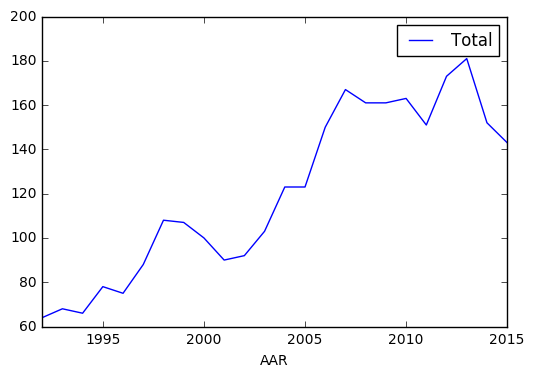

In [51]:
#Plot of the Icelandic people living in Indry By in CPH through the years - Small demo for the website vis
fig, ax = plt.subplots(1, 1)
Kbh_Stats_noDanes[((Kbh_Stats_noDanes['STATKODE'] == 5106) & (Kbh_Stats_noDanes['BYDEL'] == 1))].plot(x = 'AAR', y = 'Total', ax = ax)
plt.show()

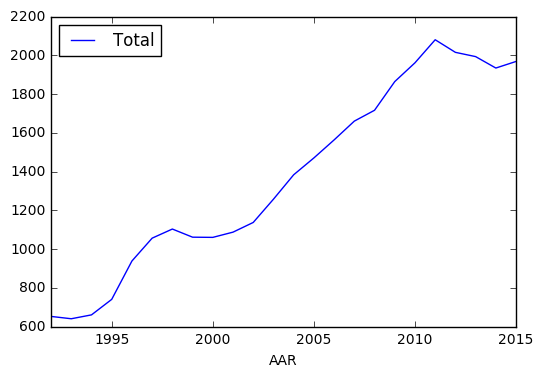

In [27]:
#  Plot of the Icelandic people living in CPH through the years
Kbh_Stats_noDanes[((Kbh_Stats_noDanes['STATKODE'] == 5106) & (Kbh_Stats_noDanes['BYDEL'] == 0))].plot(x = 'AAR', y = 'Total')
plt.show()

In [19]:
# We want to decode the country number and district number to there names
deCoder = pd.read_csv('../Data/Statcode_decoder.csv')
deCoderBydel = pd.read_csv('../Data/Bydel_decoder.csv')

#First decode the countries
for i in range(len(deCoder)):
    Kbh_Stats_noDanes.loc[(Kbh_Stats_noDanes['STATKODE'] == deCoder['STATKODE'][i]),('COUNTRY')] = deCoder['COUNTRY'][i]
    #Kbh_Stats_noDanes_nobydel.loc[(Kbh_Stats_noDanes_nobydel['STATKODE'] == deCoder['STATKODE'][i]),('COUNTRY')] = deCoder['COUNTRY'][i]
    
# We know for the DataFrame KBH_Stats we have only Denmark and All other nation!
Kbh_Stats.loc[(Kbh_Stats['STATKODE'] == 5100),('COUNTRY')] = 'Danmark'
Kbh_Stats.loc[(Kbh_Stats['STATKODE'] == -1),('COUNTRY')] = 'Foreign Nations'
    
# second decode for the districts
for i in range(len(deCoderBydel)):
    Kbh_Stats_noDanes.loc[(Kbh_Stats_noDanes['BYDEL'] == deCoderBydel['BYDELNR'][i]),('DISTRICT')] = deCoderBydel['BYDEL'][i]
    Kbh_Stats.loc[(Kbh_Stats['BYDEL'] == deCoderBydel['BYDELNR'][i]),('DISTRICT')] = deCoderBydel['BYDEL'][i]

In [24]:
# Createe a Dataframe with the top 25 most populated foreign nations in Copenhagen
Top25 = pd.DataFrame(columns = ['AAR','STATKODE','Total','Percentage','COUNTRY'])
for val,i in enumerate(AarList):
    TopDataYear = Kbh_Stats_noDanes[(Kbh_Stats_noDanes['AAR'] == i) & (Kbh_Stats_noDanes['DISTRICT'] == 'All Districts')].nlargest(25,'Total')
    Top25 = Top25.append(TopDataYear)

In [25]:
# Creata a csv file of the Dataframe.
Kbh_Stats_noDanes.to_csv('KBH_Stats_noDanes.csv', sep=',', encoding='utf-8',index = False)
Kbh_Stats.to_csv('KBH_Stats.csv', sep=',', encoding='utf-8',index = False)
Top25[['AAR','Total','COUNTRY']].to_csv('KBH_Top25_AllYears.csv', sep=',', encoding='utf-8',index = False)

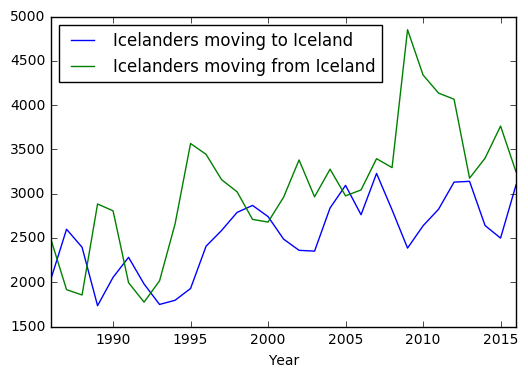

In [84]:
# Create plot to show how icelandic people are moving in/away from iceland
Island_Data = pd.read_csv('MAN01404.csv', delimiter = ';') # The data is from www.hagstofa.is
Island_Data.columns = ['Year','Country', 'Total_in', 'Total_Out']
fig, ax = plt.subplots(1, 1)
Island_Data.plot(x = 'Year', y = 'Total_in', ax=ax)
Island_Data.plot(x= 'Year', y = 'Total_Out', ax = ax)
ax.legend(['Icelanders moving to Iceland', 'Icelanders moving from Iceland'], loc = 2)
plt.show()

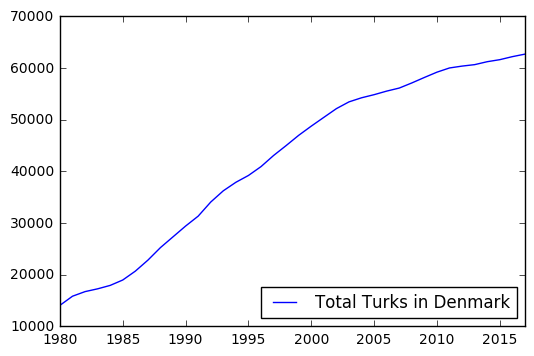

In [83]:
# Create plot of number of turks in Denmark
# the data is from http://www.dst.dk/en/Statistik
TurksDK = pd.read_csv('../Data/turksindenmkar.csv', delimiter = ';', usecols=range(1,39)).transpose()
TurksDK.columns = ['Total']
fig, ax = plt.subplots(1, 1)
TurksDK.plot(y = 'Total', ax = ax)
ax.legend(['Total Turks in Denmark'], loc = 4)
plt.show()

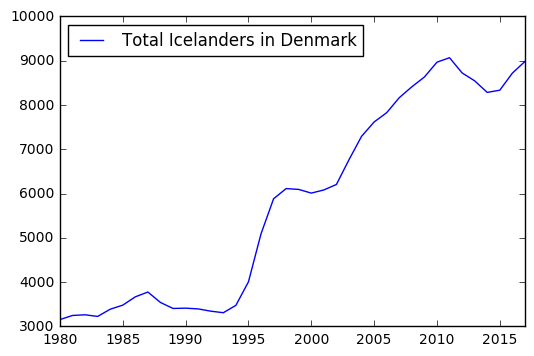

In [88]:
# Create plot of number of Icelanders in Denmark
# the data is from http://www.dst.dk/en/Statistik
IcelandDK = pd.read_csv('../Data/Icelanddenmark.csv', delimiter = ';', usecols=range(1,39)).transpose()
IcelandDK.columns = ['Total']
fig, ax = plt.subplots(1, 1)
IcelandDK.plot(y = 'Total', ax = ax)
ax.legend(['Total Icelanders in Denmark'], loc = 2)
plt.show()